In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from ipywidgets import interact

np.random.seed(1234)

In [2]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

In [3]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

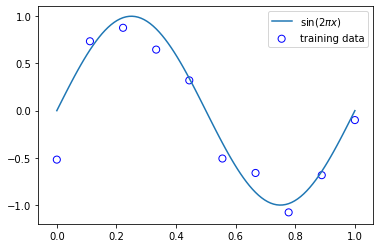

In [4]:
# plot generated data above
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [33]:
@interact
def linear_regression_normal_eq(alpha = [0, 0.00001, 0.0001, 0.001, 0.003, 0.1]):
    X_train = PolynomialFeatures(11).fit_transform(x_train.reshape(-1,1))
    X_test = PolynomialFeatures(11).fit_transform(x_test.reshape(-1,1))
    w = np.linalg.solve(alpha * np.eye(np.size(X_train, 1)) + X_train.T @ X_train, X_train.T @ y_train)
    y = X_test @ w
    
    m = len(y)
    cost = (1/(2*m)) * np.sum((y - y_test)**2)
    print(cost)
    print(computeCost(X_test, y_test, w))
    print(w)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
    plt.plot(x_test, y, label="prediction")
    plt.legend()
    plt.show()


interactive(children=(Dropdown(description='alpha', options=(0, 1e-05, 0.0001, 0.001, 0.003, 0.1), value=0), O…

In [21]:
def computeCost(X, y, w):
    m = len(y)
    J = 0
    
    h = X @ w
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [44]:
def gradientDescent(X, y, alpha=0.01, num_iters=15000):
    m = len(y)
    w = np.zeros(X.shape[1])
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X @ w
        w = w - alpha*(1/m)*(X.T @ (h-y))
        J_history[iter] = computeCost(X, y, w)
    return(w, J_history)

(10, 12)
theta:  [ 0.37298307  0.4243353  -1.53531669 -1.28963157 -0.73375609 -0.25186587
  0.1024073   0.34701043  0.50973956  0.61426495  0.6782562   0.71432538]
0.06386136858084852


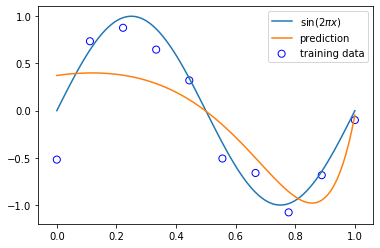

In [45]:
# theta for minimized cost J
X_train = PolynomialFeatures(11).fit_transform(x_train.reshape(-1,1))
X_test = PolynomialFeatures(11).fit_transform(x_test.reshape(-1,1))
print(X_train.shape)
w , Cost_J = gradientDescent(X_train, y_train)
print('theta: ',w.ravel())

#plt.plot(Cost_J)
#plt.ylabel('Cost J')
#plt.xlabel('Iterations');

print(computeCost(X_test, y_test, w))

y = X_test @ w
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
plt.legend()
plt.show()